In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\Data science\Project4-SwiggyAnalysis\encoded_data.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_12192\3838561704.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("C:\Data science\Project4-SwiggyAnalysis\encoded_data.csv")


,name,city,rating,rating_count,cost,cuisine,name_encoded,0,1,2,...,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161
0,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery",17038,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,theka coffee desi,Abohar,3.8,100,100,Beverages,40170,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Singh Hut,Abohar,3.7,20,250,"Fast Food,Indian",32477,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sam Uncle,Abohar,3.6,20,200,Continental,30618,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,shere punjab veg,Abohar,4.0,100,150,North Indian,40114,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56625,Jain Varities & Icecream Corner,Yavatmal,3.7,50,150,"Snacks,Fast Food",16930,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56626,Ranade Bandhu,Yavatmal,4.7,20,100,"Sweets,Fast Food",28387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56627,Satkar Dinning Hall,Yavatmal,3.6,100,200,"Maharashtrian,North Indian",31021,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56628,Suraj Hotel,Yavatmal,3.0,20,200,"North Indian,Fast Food",33854,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


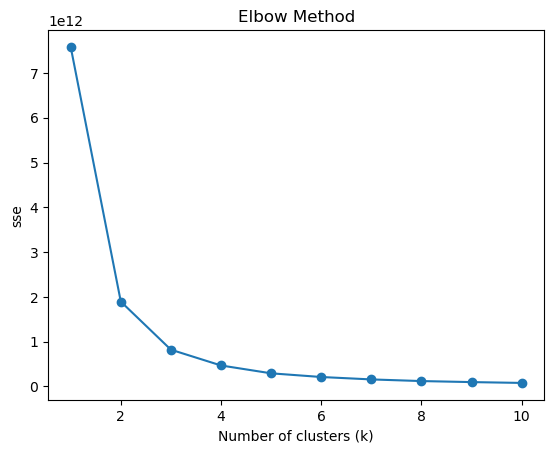

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = df.select_dtypes(include = ['number'])
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('sse')
plt.show()

In [5]:
from sklearn.cluster import KMeans
X = df.select_dtypes(include=['number'])
km = KMeans(n_clusters=4, random_state=42)

df["Cluster"] = km.fit_predict(X)

print(df.head())

                name    city  rating  rating_count  cost           cuisine  \
0  Janta Sweet House  Abohar     4.4            50   200     Sweets,Bakery   
1  theka coffee desi  Abohar     3.8           100   100         Beverages   
2          Singh Hut  Abohar     3.7            20   250  Fast Food,Indian   
3          Sam Uncle  Abohar     3.6            20   200       Continental   
4   shere punjab veg  Abohar     4.0           100   150      North Indian   

   name_encoded    0    1    2  ...  2153  2154  2155  2156  2157  2158  2159  \
0         17038  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1         40170  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         32477  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         30618  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         40114  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   2160  2161  Cluster  
0   0.0   0.0      

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = df.select_dtypes(include=['number'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5713471128716969


In [6]:
df['Cluster'].value_counts()

Cluster
0    14939
2    14156
3    14030
1    13505
Name: count, dtype: int64

In [7]:
for c in df['Cluster'].unique():
    print(f"\nCluster {c} - Top Cuisines:")
    print(df[df['Cluster'] == c]['cuisine'].value_counts().head(5))



Cluster 2 - Top Cuisines:
cuisine
North Indian,Chinese    717
Indian,Chinese          487
Indian                  479
North Indian            410
Ice Cream,Desserts      404
Name: count, dtype: int64

Cluster 3 - Top Cuisines:
cuisine
North Indian,Chinese    677
Indian                  464
Indian,Chinese          421
South Indian            416
North Indian            392
Name: count, dtype: int64

Cluster 0 - Top Cuisines:
cuisine
North Indian,Chinese    653
Indian                  450
Indian,Chinese          437
North Indian            393
Pizzas                  389
Name: count, dtype: int64

Cluster 1 - Top Cuisines:
cuisine
North Indian,Chinese    661
North Indian            604
Indian                  499
Pizzas                  434
Indian,Chinese          396
Name: count, dtype: int64


In [8]:
for c in df['Cluster'].unique():
    print(f"\nCluster {c} - Top Cities:")
    print(df[df['Cluster'] == c]['city'].value_counts().head(5))



Cluster 2 - Top Cities:
city
Bangalore    1386
Chennai      1056
Delhi         965
Hyderabad     888
Pune          868
Name: count, dtype: int64

Cluster 3 - Top Cities:
city
Bangalore    1474
Hyderabad    1084
Delhi        1054
Chennai      1046
Pune          886
Name: count, dtype: int64

Cluster 0 - Top Cities:
city
Bangalore    1633
Delhi        1171
Chennai      1117
Hyderabad     959
Pune          829
Name: count, dtype: int64

Cluster 1 - Top Cities:
city
Bangalore    1405
Delhi         988
Hyderabad     957
Chennai       939
Pune          791
Name: count, dtype: int64


In [10]:
df['cost'].unique()

array([ 200,  100,  250,  150,  300,  400,  399,  249,  350,  500,   99,
        120,  499,  299,  199,   50,  349,  600,  599,  290,  175,  450,
        125,    8,  375,  275, 1000,  425,  325,  160,  180,  225,  700,
         59, 1200,  310,  800,  900,  550,  650,  149,  170,  110,  280,
        130, 1100,  140, 1600,   55,  220,  179,  240,    2,   20,   80,
        230,   25,   75,  159,  270,  750,  710, 1250,  178,  257,   60,
        171,  193,  330,   90,  190,  197,   70,  336,  245, 1300,  126,
        260,  268,  421,  239,  850, 1400,  497,  176, 1800,  255,  360,
        438,  129,  320,   69, 1500,    5,   10,  950,  480,  258,  359,
         85,  224,  590,  703,  363,  790,  798,   15,  355,  999,  440,
         89,  298,  210,  559,  532,  288,  214,  284,  380,  746,  269,
        502,  370,  203,  296,  251,  597,  327,  169,  198,  248,  263,
         28,  340,   40, 2000,   79,  196,  680,    1,  520,  147,  152,
        580, 1700,  219,  138,  313,   65,  799,  2

In [11]:
df.duplicated().sum()

0

In [9]:
df.groupby('Cluster')['cost'].agg(['min', 'max'])


,min,max
Cluster,,
0,2,2200
1,1,2509
2,1,3000
3,1,2700


In [14]:
df['Cluster'].unique()

array([2, 3, 0, 1])

In [ ]:
df.to_csv("C://Data science//Project4-SwiggyAnalysis//cleaned_data.csv")
df.to_pickle("C://Data science//Project4-SwiggyAnalysis//encoded_data_Cluster.csv")